In [1]:
##/Users/maia/Desktop/GEOL4021/Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [23]:
# Earth datasets
isua = pd.read_csv("P2O5ISUAFiltered.csv")
kaapvaal = pd.read_csv("P2O5KAAPVAALFiltered.csv")
pilbara = pd.read_csv("P2O5PILBARAFiltered.csv")

# Mars PIXL dataset
pixl = pd.read_csv("PIXLKizovski2025.csv")


In [3]:
def clean_earth(df, pcol):
    df["AGE (MIN.)"] = pd.to_numeric(df["AGE (MIN.)"], errors="coerce")
    df["AGE (MAX.)"] = pd.to_numeric(df["AGE (MAX.)"], errors="coerce")
    df.dropna(subset=["AGE (MIN.)", "AGE (MAX.)"], inplace=True)

    df["Median_Age"] = (df["AGE (MIN.)"] + df["AGE (MAX.)"]) / 2
    df["P2O5"] = pd.to_numeric(df[pcol], errors="coerce")
    df = df.dropna(subset=["P2O5"])
    return df

isua = clean_earth(isua, "P2O5 (wt%) Isua")
kaapvaal = clean_earth(kaapvaal, "P2O5 (wt%) Kaapvaal")
pilbara = clean_earth(pilbara, "P2O5 (wt%) Pilbara")


In [4]:
def extract_sol(text):
    try:
        return int(text.split()[1])
    except:
        return np.nan

pixl["Sol"] = pixl["Map"].apply(extract_sol)
pixl.dropna(subset=["Sol"], inplace=True)

pixl["P2O5"] = pd.to_numeric(pixl["P2O5 (wt%)"], errors="coerce")
pixl = pixl.dropna(subset=["P2O5"])


In [5]:
def add_transforms(df):
    df["logP2O5"] = np.log10(df["P2O5"].replace(0, np.nan))
    df["zP2O5"] = (df["P2O5"] - df["P2O5"].mean()) / df["P2O5"].std()
    return df

isua = add_transforms(isua)
kaapvaal = add_transforms(kaapvaal)
pilbara = add_transforms(pilbara)
pixl = add_transforms(pixl)


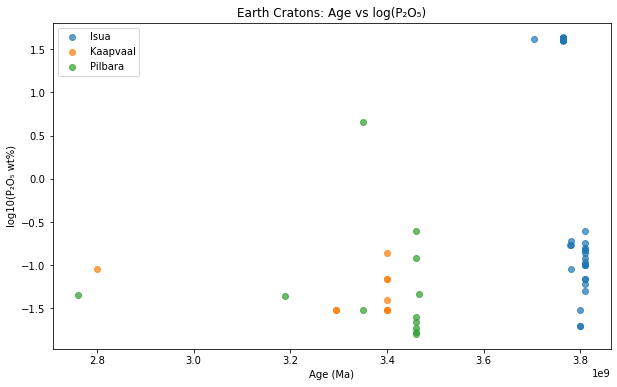

In [6]:
plt.figure(figsize=(10,6))

plt.scatter(isua["Median_Age"], isua["logP2O5"], label="Isua", alpha=0.7)
plt.scatter(kaapvaal["Median_Age"], kaapvaal["logP2O5"], label="Kaapvaal", alpha=0.7)
plt.scatter(pilbara["Median_Age"], pilbara["logP2O5"], label="Pilbara", alpha=0.7)

plt.xlabel("Age (Ma)")
plt.ylabel("log10(P₂O₅ wt%)")
plt.title("Earth Cratons: Age vs log(P₂O₅)")
plt.legend()
plt.show()


/Users/maia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/nonparametric/smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


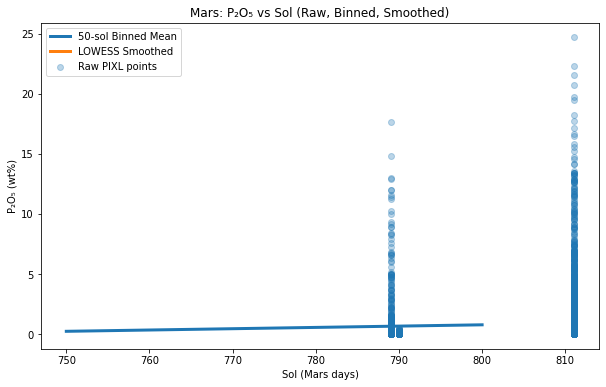

In [8]:
pixl["Sol_bin"] = (pixl["Sol"] // 50) * 50
binned = pixl.groupby("Sol_bin")["P2O5"].mean()


lowess = sm.nonparametric.lowess

smooth = lowess(pixl["P2O5"], pixl["Sol"], frac=0.3)


plt.figure(figsize=(10,6))

plt.scatter(pixl["Sol"], pixl["P2O5"], alpha=0.3, label="Raw PIXL points")
plt.plot(binned.index, binned.values, label="50-sol Binned Mean", linewidth=3)
plt.plot(smooth[:,0], smooth[:,1], label="LOWESS Smoothed", linewidth=3)

plt.xlabel("Sol (Mars days)")
plt.ylabel("P₂O₅ (wt%)")
plt.title("Mars: P₂O₅ vs Sol (Raw, Binned, Smoothed)")
plt.legend()
plt.show()


In [21]:

import mpltern  # <-- ternary axes

plt.figure(figsize=(8, 8))
ax = plt.subplot(projection='ternary')

# Earth and Mars datasets
datasets = {
    "Isua": isua,
    "Pilbara": pilbara,
    "Kaapvaal": kaapvaal,
    "Mars (PIXL)": pixl
}

colors = {
    "Isua": "blue",
    "Pilbara": "red",
    "Kaapvaal": "green",
    "Mars (PIXL)": "orange"
}

for name, df in datasets.items():
    ax.scatter(dfEG['P2O5(WT%)''], dfEK['FE2O3(WT%)'], dfEP['S(WT%)'], 
               s=20, alpha=0.7, color=colors[name], label=name)

ax.set_tlabel("P₂O₅ (wt%)")
ax.set_llabel("Fe₂O₃ (wt%)")
ax.set_rlabel("SiO₂ (wt%)")

ax.set_title("Ternary Composition: P₂O₅ – Fe₂O₃ – SiO₂")
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (4228518299.py, line 22)